<a href="https://colab.research.google.com/github/GowthamNats/FakeNewsDetection/blob/main/FakeNewsDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# News Classification

## Final Code

### Imports

In [ ]:
!pip install nltk

In [ ]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 20.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import sklearn
sklearn.__version__

'1.3.0'

In [ ]:
# Basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
# NLP
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
nltk.download("punkt")
nltk.download("stopwords")
from wordcloud import WordCloud
# Vectorization
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# Train Test Split
from sklearn.model_selection import train_test_split
# Models
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
# Alter Models
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Read Contents

In [ ]:
df = pd.read_csv("/content/dataset.csv", on_bad_lines='skip', engine="python")
df.dropna(inplace=True)
df.sample(5)

,Unnamed: 0.1,Unnamed: 0,title,text,value,transformed_text
1386,1386,14920,UK's Johnson apologizes for distress caused by...,LONDON (Reuters) - British Foreign Secretary B...,1,london reuter british foreign secretari bori j...
680,680,19605,North Korea grants Malaysian prince access to ...,KUALA LUMPUR (Reuters) - North Korea has grant...,1,kuala lumpur reuter north korea grant soccer l...
1347,1347,9852,ABC Producing Comedy Involving Illegal Alien F...,ABC just announced that it s developing a c...,0,abc announc develop comedi seri illeg alien fa...
1266,1266,14791,China corruption could lead to Soviet-style co...,BEIJING (Reuters) - China must step up its bat...,1,beij reuter china must step battl corrupt orde...
226,226,20237,Hardliners protest French labor reform after M...,PARIS (Reuters) - Tens of thousands of hard-le...,1,pari reuter ten thousand trade unionist march ...


### Word Cloud generation

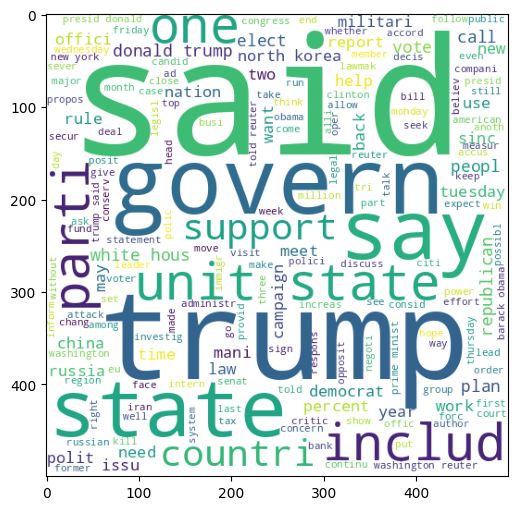

In [ ]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

# Real word cloud
real_wc = wc.generate(df[df["value"] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15, 6))
plt.imshow(real_wc)

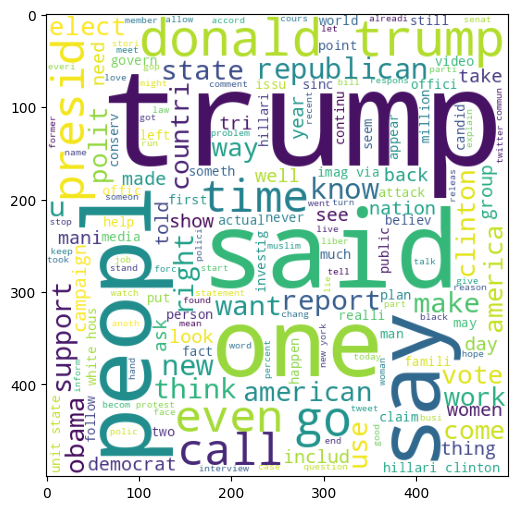

In [ ]:
# Fake word cloud
fake_wc = wc.generate(df[df["value"] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15, 6))
plt.imshow(fake_wc)

### Vectorization and Data split

In [ ]:
# Vectorize transformed text
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

scaler = MinMaxScaler()

X = tfidf.fit_transform(df['transformed_text']).toarray()
X = scaler.fit_transform(X)
Y = df["value"].values

In [ ]:
# Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

### Model Building

In [ ]:
# Models
# The params could be tuned to get a better fit
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=100, random_state=2)
bc = BaggingClassifier(n_estimators=200, random_state=2)
etc = ExtraTreesClassifier(n_estimators=300, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=200, random_state=2)
xgb = XGBClassifier(n_estimators=200, random_state=2)
# Post Observation -> Chose the top 3 models
estimators = [("DT", dtc), ("RF", rfc), ("AdaBoost", abc)]
final_estimator = DecisionTreeClassifier()

voting = VotingClassifier(estimators=estimators, voting='soft')
stacking = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
# Classifier dictionary
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'GNB': gnb,
    'MNB': mnb,
    'BNB' : bnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb': xgb,
    'Voting': voting,
    'Stack': stacking
}

In [ ]:
# Classifier function
def train_classifier(clf, X_train, Y_train, X_test, Y_test):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)

    return accuracy, precision

In [ ]:
# Model Evaluation
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy, current_precision = train_classifier(clf, X_train, Y_train, X_test, Y_test)

    print("For ", name)
    print("Accuracy - ",  current_accuracy)
    print("Precision - ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.8952380952380953
Precision -  0.9064327485380117
For  KN
Accuracy -  0.4634920634920635
Precision -  1.0
For  GNB
Accuracy -  0.8761904761904762
Precision -  0.893491124260355
For  MNB
Accuracy -  0.946031746031746
Precision -  0.9479768786127167
For  BNB
Accuracy -  0.9523809523809523
Precision -  0.953757225433526
For  DT
Accuracy -  0.9777777777777777
Precision -  0.9714285714285714
For  LR
Accuracy -  0.9777777777777777
Precision -  0.9824561403508771
For  RF
Accuracy -  0.9873015873015873
Precision -  0.9827586206896551
For  AdaBoost
Accuracy -  0.9873015873015873
Precision -  0.9827586206896551
For  BgC
Accuracy -  0.9873015873015873
Precision -  0.9827586206896551
For  ETC
Accuracy -  0.9714285714285714
Precision -  0.9657142857142857
For  GBDT
Accuracy -  0.9873015873015873
Precision -  0.9827586206896551
For  xgb
Accuracy -  0.9873015873015873
Precision -  0.9827586206896551
For  Voting
Accuracy -  0.9841269841269841
Precision -  0.9771428571428571
For  

### Evaluation Check

In [ ]:
performance_df = pd.DataFrame({"Algorithm": clfs.keys(), "Accuracy": accuracy_scores, "Precision": precision_scores})
performance_df = performance_df.sort_values(["Accuracy", "Precision"], ascending=[False, False])
performance_df

,Algorithm,Accuracy,Precision
7,RF,0.987302,0.982759
8,AdaBoost,0.987302,0.982759
9,BgC,0.987302,0.982759
11,GBDT,0.987302,0.982759
12,xgb,0.987302,0.982759
13,Voting,0.984127,0.977143
14,Stack,0.984127,0.977143
6,LR,0.977778,0.982456
5,DT,0.977778,0.971429
10,ETC,0.971429,0.965714


In [ ]:
melt_performance_df = pd.melt(performance_df, id_vars="Algorithm")
melt_performance_df

,Algorithm,variable,value
0,RF,Accuracy,0.987302
1,AdaBoost,Accuracy,0.987302
2,BgC,Accuracy,0.987302
3,GBDT,Accuracy,0.987302
4,xgb,Accuracy,0.987302
5,Voting,Accuracy,0.984127
6,Stack,Accuracy,0.984127
7,LR,Accuracy,0.977778
8,DT,Accuracy,0.977778
9,ETC,Accuracy,0.971429


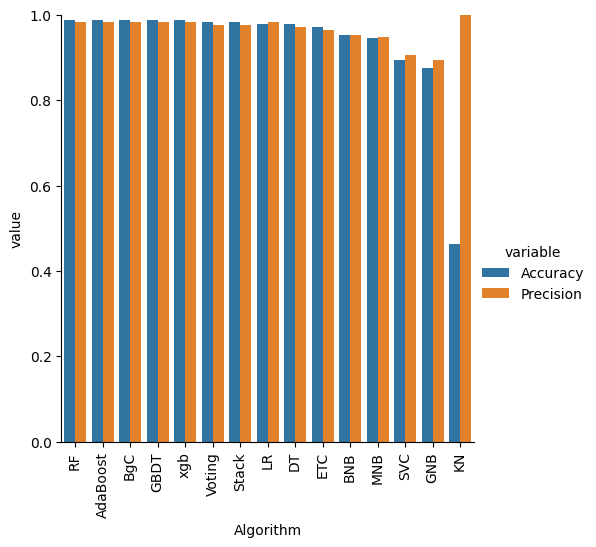

In [ ]:
sns.catplot(x = 'Algorithm', y ='value', hue = 'variable',data = melt_performance_df, kind = 'bar', height = 5)
plt.ylim(0, 1.0)
plt.xticks(rotation = 'vertical')
plt.show()

### Testing with a custom input

In [ ]:
input_text = df.iloc[0]["text"]
input_text

'BRUSSELS (Reuters) - The European Union must take responsibility for dealing with neighbors Russia, Africa and the Middle East, its commissioner for “neighborhood policy” said on Wednesday after Donald Trump was elected U.S. president. “Europe must shoulder its own share of international responsibility, especially in its neighborhood,” Johannes Hahn said on Twitter, although he also said: “America and Europe have always been strongest when they worked together.” During his campaign, Trump promised radical changes in U.S. policy, praised Russian President Vladimir Putin and questioned the cost of U.S. military and other commitments in Europe. The EU faces a more aggressive Russia to the east, conflicts in the Middle East to the south and an increased threat from Islamist militants among others. The conservative leader in the European Parliament, Manfred Weber, an ally of German Chancellor Angela Merkel, said: “The message is clear: it is now up to Europe. We must be more self-confident

In [ ]:
ps = PorterStemmer()
def transform_text(text):
    # Lowercase
    text = text.lower()

    # Tokenization
    text = nltk.word_tokenize(text)

    # Remove special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    # Remove stopwords and punctuations
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()

    # Stemmer
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [ ]:
def func(input_text: str):
  transformed_input = transform_text(input_text)
  vector_input = tfidf.transform([transformed_input])
  result = dtc.predict(vector_input)[0]
  if result == 1:
    return "Real News"
  return "Fake News"

In [ ]:
# Algorithm
transformed_input = transform_text(input_text)
vector_input = tfidf.transform([transformed_input])
result = dtc.predict(vector_input)[0]
if result == 1:
  print("Real News")
else:
  print("Fake News")

Real News


### Save the model

In [ ]:
import pickle
with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf, file)
with open('model.pkl', 'wb') as file:
    pickle.dump(abc, file)
with open('function1.pkl', 'wb') as file:
    pickle.dump(func, file)

## Dataset Refining and formatting
(just to view)

In [ ]:
!pip install nltk

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df = pd.read_csv("/content/file1.csv", on_bad_lines='skip', engine="python")
df.sample(5)

,Unnamed: 0,title,text,value
1342,15284,“DEAL WITH IT”: YOU’LL LOVE WHAT TRUMP CHOSE T...,Trump s not backing down from his in your fac...,0
153,22248,Trump Revives Keystone and Dakota Access Pipel...,"21st Century Wire says Tuesday, President Dona...",0
1241,9600,"Exclusive: Trump surges in support, almost eve...",NEW YORK (Reuters) - Donald Trump’s support h...,1
1235,13432,"Expect more war, hunger, Islamist violence in ...",GENEVA (Reuters) - Humanitarian crises around ...,1
486,19435,U.N. team to collect evidence of Islamic State...,UNITED NATIONS (Reuters) - The United Nations ...,1


In [ ]:
df["value"].value_counts()

1    817
0    773
Name: value, dtype: int64

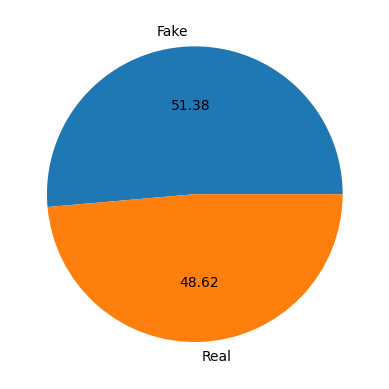

In [ ]:
plt.pie(df["value"].value_counts(), labels=["Fake", "Real"], autopct="%.2f")
plt.show()

In [ ]:
ps = PorterStemmer()

In [ ]:
def transform_text(text):
    # Lowercase
    text = text.lower()

    # Tokenization
    text = nltk.word_tokenize(text)

    # Remove special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    # Remove stopwords and punctuations
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()

    # Stemmer
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)
df.sample(5)

,Unnamed: 0,title,text,value,transformed_text
893,16758,WHY WOULD OBAMA ALLOW GREEN BERET To Be Discha...,It s hard to read stories like this without wo...,0,hard read stori like without wonder command ch...
196,8758,"Flint, MI: Ten Dead, Eighty-Seven Infected Wi...","On January 13, 2016, Michigan governor Rick Sn...",0,januari 13 2016 michigan governor rick snyder ...
662,1606,"Plane Passengers Get Into ALL OUT BRAWL, Then...",Yet another altercation has erupted on board a...,0,yet anoth alterc erupt board airplan time boar...
1518,14105,"POPE MEETS WITH ANGRY, JEWISH, PR0 LATE-TERM A...",As a Catholic I m offended by this Pope s poli...,0,cathol offend pope polit meddl presidenti elec...
350,3372,"Despite Trump vow to end catch and release, he...","McAllen, Texas (Reuters) - Standing on the blu...",1,mcallen texa reuter stand bluff roma texa may ...


In [ ]:
df.to_csv('/content/dataset.csv')

# News Segment Detection and OCR

## Links to check out
[Segment detection](https://towardsdatascience.com/object-detection-on-newspaper-images-using-yolov3-85acfa563080)

[Tesseract with OpenCV](https://www.analyticsvidhya.com/blog/2020/05/build-your-own-ocr-google-tesseract-opencv/)

[How to use Cloud Vision API](https://www.youtube.com/watch?v=TTeVtJNWdmI)

We could either build a model which combines Object Detection with OCR or just use Google Cloud Vision API (much easier but need to check for quota)

### Necessary Imports

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 606.2/606.2 kB 4.9 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import torch
import torchvision.transforms as transforms
from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
yolo_model = torch.hub.load("ultralytics/yolov5", "yolov5s")

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-8-5 Python-3.10.12 torch-2.0.1+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
image = Image.open("/content/sample.jpg")
width, height = image.size

In [ ]:
yolo_results = yolo_model(image)
# Extract bounding box coordinates, confidences, and class labels
boxes = yolo_results.xyxy[0].numpy()[:, :4]
confidences = yolo_results.xyxy[0].numpy()[:, 4]
class_ids = yolo_results.xyxy[0].numpy()[:, 5]

# Convert PIL image to OpenCV format
image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

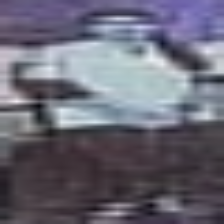

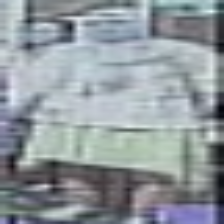

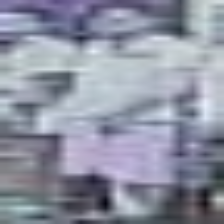

In [ ]:
# # Convert the BGR image to RGB
# image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# # Convert the RGB image to PIL Image
# image_pil = Image.fromarray(image_rgb)

# # Perform object detection
# yolo_results = yolo_model(image_pil)

# # Get the detected objects' bounding boxes
# boxes = yolo_results.xyxy[0].numpy()[:, :4]
# confidences = yolo_results.xyxy[0].numpy()[:, 4]
# class_ids = yolo_results.xyxy[0].numpy()[:, 5]

# # Initialize tags list
# tags = []

# Draw bounding boxes and send cropped images to ML models
for box, confidence, class_id in zip(boxes, confidences, class_ids):
    preds = []

    # Extract box coordinates
    xmin, ymin, xmax, ymax = box.astype(int)

    # Crop the object region using NumPy array indexing
    cropped_image = image[ymin:ymax, xmin:xmax]

    # Resizing the cropped part
    resized_image = cv2.resize(cropped_image, (224, 224))
    # resized_image = resized_image.reshape(1, 224, 224, 3)
    cv2_imshow(resized_image)